In [83]:
import h5py
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import heapq

import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("ticks")

In [84]:
froot ="/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/*"
flists = np.sort(glob.glob(froot))
XMIN = 3000
XMAX = 9000

In [87]:
len(flists)

3981

## open the file and get 1 minute recording from channel 3000 - 9000

In [115]:
fp = h5py.File(flists[-1], 'r')
rawData = fp['Acquisition']['Raw[0]']['RawData'][XMIN:XMAX, :].astype(float)
print(flists[-1])

/data/data2/south-data-ejm/hdd/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-01T16_09_15-0700/South-C1-LR-95km-P1kHz-GL50m-SP2m-FS200Hz_2021-11-04T173114Z.h5


Text(0.5, 1.0, 'raw data')

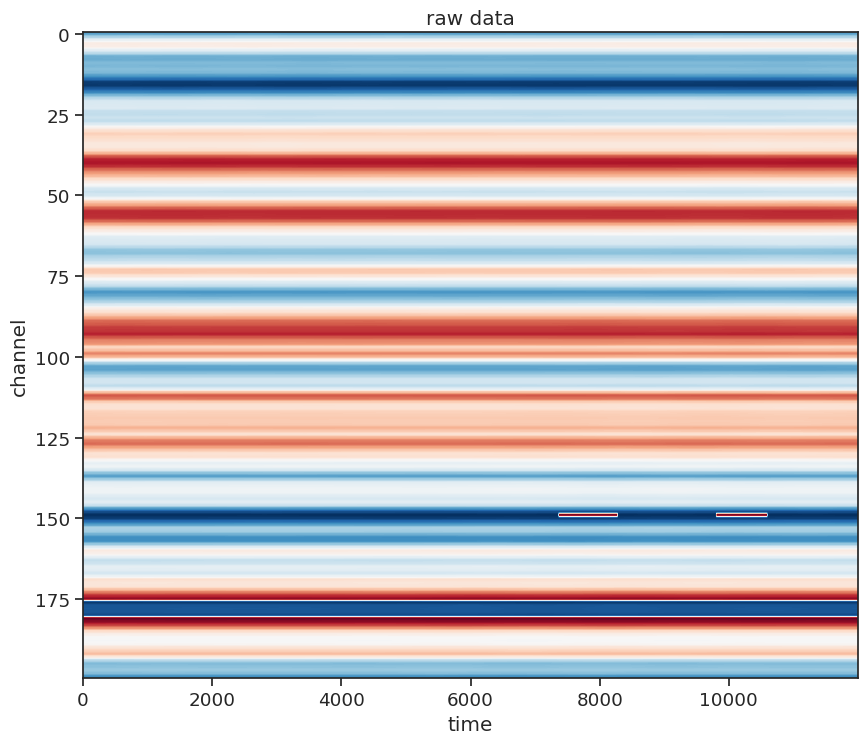

In [117]:
plt.figure(figsize = (10, 10), dpi = 100)
plt.imshow(rawData[300:500, :], cmap = 'RdBu', aspect = 50)
plt.xlabel("time")
plt.ylabel("channel")
plt.title("raw data")

Text(0.5, 0, 'time')

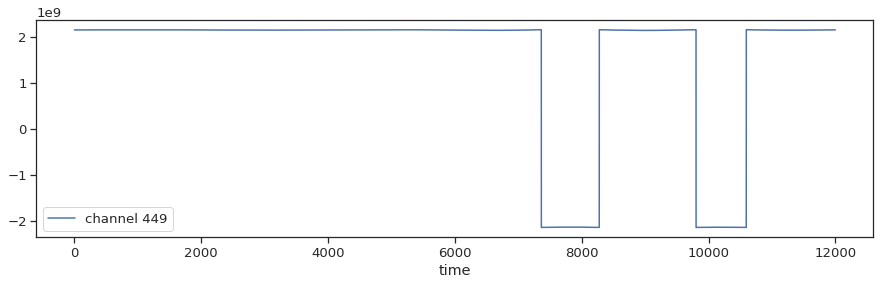

In [118]:
plt.figure(figsize = (15, 4))
plt.plot(rawData[449, :], label = f'channel 449')
plt.legend()
plt.xlabel("time")

Text(0.5, 1.0, 'raw data')

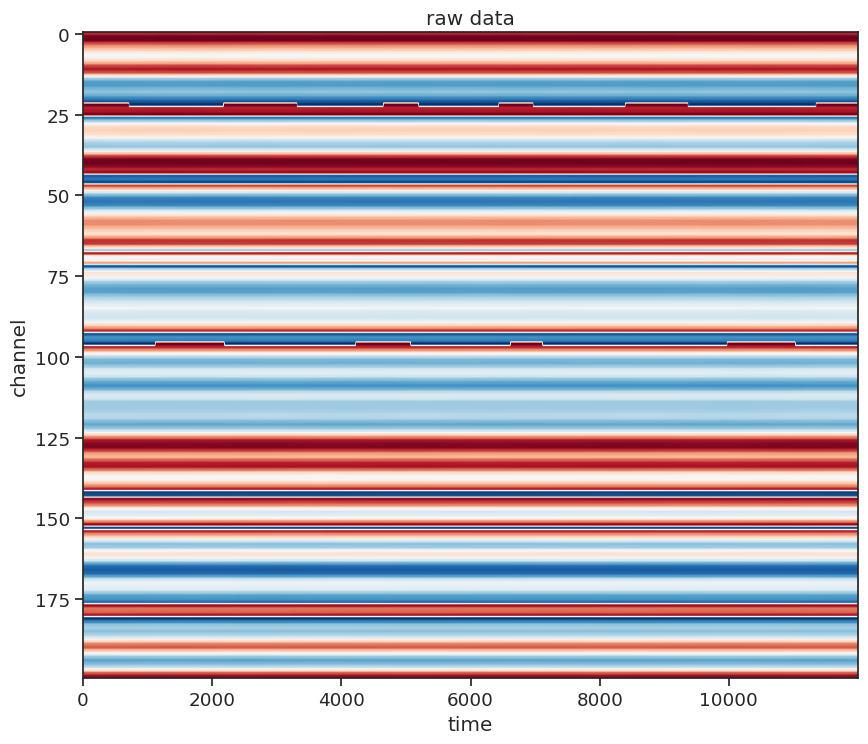

In [119]:
plt.figure(figsize = (10, 10), dpi = 100)
plt.imshow(rawData[800:1000, :], cmap = 'RdBu', aspect = 50)
plt.xlabel("time")
plt.ylabel("channel")
plt.title("raw data")

Text(0.5, 0, 'time')

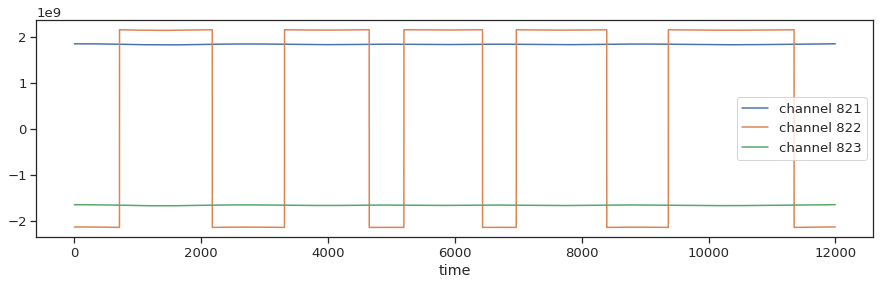

In [120]:
plt.figure(figsize = (15, 4))
for i in [821, 822, 823]:
    plt.plot(rawData[i, :], label = f'channel {i}')
plt.legend()
plt.xlabel("time")